In [172]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [173]:
df1 = pd.read_csv('data/201701-citibike-tripdata.csv')
df1.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [174]:
df1.columns = map(str.lower, df1.columns)
df1.columns

Index(['trip duration', 'start time', 'stop time', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bike id', 'user type',
       'birth year', 'gender'],
      dtype='object')

In [175]:
df1.columns = [c.replace(' ', '_') for c in df1.columns]
df1.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'birth_year', 'gender'],
      dtype='object')

In [176]:
df2 = pd.read_csv('data/201707-citibike-tripdata.csv')

In [177]:
df2.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [178]:
df2.rename(columns={'tripduration':'trip duration'}, inplace=True)
df2.rename(columns={'starttime':'start time'}, inplace=True)
df2.rename(columns={'stoptime':'stop time'}, inplace=True)
df2.rename(columns={'bikeid':'bike id'}, inplace=True)
df2.rename(columns={'usertype':'user type'}, inplace=True)

df2.columns = [c.replace(' ', '_') for c in df2.columns]

df2.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'birth_year', 'gender'],
      dtype='object')

In [179]:
# concatenate the two dataframes into one
df = pd.concat([df1, df2])
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


# Trip Duration

In [180]:
# create 'hour' column that takes just hour from time from start_time
df['hour'] = pd.to_datetime(df['start_time']).dt.hour

df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,hour
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,0
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,0
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0,0


In [181]:
df.iloc[6000:6005]

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,hour
6000,1396,2017-01-01 13:38:09,2017-01-01 14:01:25,3137,5 Ave & E 73 St,40.772828,-73.966853,3165,Central Park West & W 72 St,40.775794,-73.976206,20187,Customer,NaN,0,13
6001,147,2017-01-01 13:38:17,2017-01-01 13:40:44,3141,1 Ave & E 68 St,40.765005,-73.958185,3372,E 74 St & 1 Ave,40.768974,-73.954823,20080,Subscriber,1968.0,1,13
6002,301,2017-01-01 13:38:22,2017-01-01 13:43:24,3178,Riverside Dr & W 78 St,40.784145,-73.983625,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,26708,Subscriber,1961.0,1,13
6003,1429,2017-01-01 13:38:25,2017-01-01 14:02:15,497,E 17 St & Broadway,40.737050,-73.990093,454,E 51 St & 1 Ave,40.754557,-73.965930,21231,Subscriber,1992.0,2,13
6004,1467,2017-01-01 13:38:28,2017-01-01 14:02:55,249,Harrison St & Hudson St,40.718710,-74.009001,212,W 16 St & The High Line,40.743349,-74.006818,19452,Subscriber,1959.0,2,13


In [182]:
# create day/night column

# func for determining day or night

def diurnal(x):
    if x >= 7 and x <= 18:
        return 1  # is day
    else:
        return 0 # is night
    
    
df['diurnal'] = df.hour.apply(diurnal)

In [183]:
df.iloc[5000:5005]

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,hour,diurnal
5000,1189,2017-01-01 12:56:58,2017-01-01 13:16:48,293,Lafayette St & E 8 St,40.730207,-73.991026,426,West St & Chambers St,40.717548,-74.013221,15922,NaN,1996.0,1,12,1
5001,738,2017-01-01 12:56:58,2017-01-01 13:09:17,490,8 Ave & W 33 St,40.751551,-73.993934,513,W 56 St & 10 Ave,40.768254,-73.988639,17254,Subscriber,1949.0,1,12,1
5002,228,2017-01-01 12:57:04,2017-01-01 13:00:53,308,St James Pl & Oliver St,40.713079,-73.998512,361,Allen St & Hester St,40.716059,-73.991908,15740,Subscriber,1957.0,1,12,1
5003,295,2017-01-01 12:57:02,2017-01-01 13:01:58,482,W 15 St & 7 Ave,40.739355,-73.999318,127,Barrow St & Hudson St,40.731724,-74.006744,27226,Subscriber,1981.0,1,12,1
5004,552,2017-01-01 12:57:04,2017-01-01 13:06:16,349,Rivington St & Ridge St,40.718502,-73.983299,308,St James Pl & Oliver St,40.713079,-73.998512,24871,Subscriber,1984.0,1,12,1


### H0: The tripduration of daytime riders and nighttime riders come from same distribution . 

### H1: The tripduration of daytime riders and nighttime riders come from different distributions.

### alpha = 0.05

In [184]:
# axD = df.trip_duration.groupby(df.hour, {lambda x: (x['diurnal'] == 1)}).agg([count_nonzero]).plot(kind='bar', legend=False)
# axD.set_title("day riders")

# axN = df.trip_duration.groupby(df.hour, {lambda x: (x['diurnal'] == 0)}).agg([count_nonzero]).plot(kind='bar', legend=False)
# axN.set_title("night riders")

In [185]:
ks = scipy.stats.ks_2samp(df.trip_duration[df.diurnal == 0], df.trip_duration[df.diurnal == 1])
ks

Ks_2sampResult(statistic=0.027609370549812218, pvalue=2.6307153404315628e-298)

Since the p-value is less than 0.05, the null hypothesis is rejected that the tripduration fo day and night time riders are uncorrelated

In [186]:
day_trips = df.trip_duration[df.diurnal == 1].as_matrix()
night_trips = df.trip_duration[df.diurnal == 0].as_matrix()

In [187]:
day_trips

array([1388,  231, 2023, ..., 2572,  595,  249])

In [188]:
night_trips

array([ 680, 1282,  648, ..., 1211,  547, 1816])

In [189]:
n_day_trips = np.random.choice(day_trips, len(night_trips), replace=False)
n_day_trips

array([ 923, 1214,  181, ...,  315, 1158,  830])

In [190]:
n_day_trips = sorted(n_day_trips)
n_night_trips = sorted(night_trips)

print(len(n_day_trips), len(n_night_trips))

592138 592138


In [191]:
pear = scipy.stats.pearsonr(n_day_trips, n_night_trips)
pear

(0.90184750146508752, 0.0)

Since the p-value is less than 0.05, the null hypothesis is rejected that the tripduration fo day and night time riders are uncorrelated

In [192]:
scipy.stats.pearsonr(n_day_trips, n_day_trips)

(1.0, 0.0)

In [193]:
spear = scipy.stats.spearmanr(n_day_trips, n_night_trips)
spear

SpearmanrResult(correlation=0.99999937248359705, pvalue=0.0)

Since the p-value is less than 0.05, the null hypothesis is rejected that the tripduration fo day and night time riders are uncorrelated

# Age of bikers for trips originating in Manhattan and in Brooklyn

In [194]:
df.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'birth_year', 'gender', 'hour', 'diurnal'],
      dtype='object')

In [195]:
# calculate age
df['age']=2017-df['birth_year']

In [196]:
# drop nulls
df=df.dropna(subset=['age'],axis=0)

In [197]:
df.head()

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,hour,diurnal,age
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,0,0,52.0
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,0,0,30.0
5,666,2017-01-01 00:01:51,2017-01-01 00:12:57,3163,Central Park West & W 68 St,40.773407,-73.977825,3163,Central Park West & W 68 St,40.773407,-73.977825,16050,Subscriber,2000.0,1,0,0,17.0
6,559,2017-01-01 00:05:00,2017-01-01 00:14:20,499,Broadway & W 60 St,40.769155,-73.981918,479,9 Ave & W 45 St,40.760193,-73.991255,27294,Subscriber,1973.0,1,0,0,44.0
7,826,2017-01-01 00:05:37,2017-01-01 00:19:24,362,Broadway & W 37 St,40.751726,-73.987535,445,E 10 St & Avenue A,40.727408,-73.981420,23288,Subscriber,1977.0,2,0,0,40.0


In [198]:
# border out Manhattan and Brooklyn
conditions = [
    (df['start_station_latitude']>= 40.697072) & (df['start_station_longitude'] <= -73.911243),
    (df['start_station_latitude']<=40.730043)&(df['start_station_longitude']<=-73.967100)
    ]
choices = ['manhattan', 'brooklyn']
df['borough'] = np.select(conditions, choices, default='unknown')

In [199]:
df.iloc[5000:5010]

,trip_duration,start_time,stop_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,birth_year,gender,hour,diurnal,age,borough
6351,880,2017-01-01 13:51:41,2017-01-01 14:06:22,3407,Union St & Nevins St,40.679098,-73.987655,3349,Grand Army Plaza & Plaza St West,40.672968,-73.970880,26380,Subscriber,1985.0,2,13,1,32.0,brooklyn
6352,1499,2017-01-01 13:51:43,2017-01-01 14:16:42,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,532,S 5 Pl & S 4 St,40.710451,-73.960876,18834,Subscriber,1956.0,2,13,1,61.0,manhattan
6353,133,2017-01-01 13:51:44,2017-01-01 13:53:58,498,Broadway & W 32 St,40.748549,-73.988084,486,Broadway & W 29 St,40.746201,-73.988557,26575,Subscriber,1954.0,1,13,1,63.0,manhattan
6354,1752,2017-01-01 13:51:46,2017-01-01 14:20:58,3349,Grand Army Plaza & Plaza St West,40.672968,-73.970880,3339,Berkeley Pl & 6 Ave,40.676530,-73.978469,27088,Subscriber,1969.0,2,13,1,48.0,brooklyn
6355,506,2017-01-01 13:51:49,2017-01-01 14:00:16,127,Barrow St & Hudson St,40.731724,-74.006744,435,W 21 St & 6 Ave,40.741740,-73.994156,25266,Subscriber,1985.0,1,13,1,32.0,manhattan
6356,270,2017-01-01 13:51:51,2017-01-01 13:56:21,237,E 11 St & 2 Ave,40.730473,-73.986724,285,Broadway & E 14 St,40.734546,-73.990741,16517,Subscriber,1993.0,2,13,1,24.0,manhattan
6358,210,2017-01-01 13:51:59,2017-01-01 13:55:29,365,Fulton St & Grand Ave,40.682232,-73.961458,344,Monroe St & Bedford Ave,40.685144,-73.953809,14695,Subscriber,1974.0,1,13,1,43.0,unknown
6360,307,2017-01-01 13:52:02,2017-01-01 13:57:10,402,Broadway & E 22 St,40.740343,-73.989551,345,W 13 St & 6 Ave,40.736494,-73.997044,20598,Subscriber,1981.0,1,13,1,36.0,manhattan
6362,617,2017-01-01 13:52:05,2017-01-01 14:02:22,480,W 53 St & 10 Ave,40.766697,-73.990617,3163,Central Park West & W 68 St,40.773407,-73.977825,20351,Subscriber,1959.0,1,13,1,58.0,manhattan
6363,649,2017-01-01 13:52:06,2017-01-01 14:02:56,3233,E 48 St & 5 Ave,40.757246,-73.978059,508,W 46 St & 11 Ave,40.763414,-73.996674,26560,Subscriber,1961.0,1,13,1,56.0,manhattan


In [205]:
manhattan_df = df[df['borough'] == 'manhattan']
brooklyn_df = df[df['borough'] == 'brooklyn']

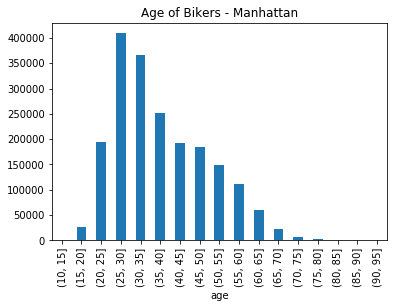

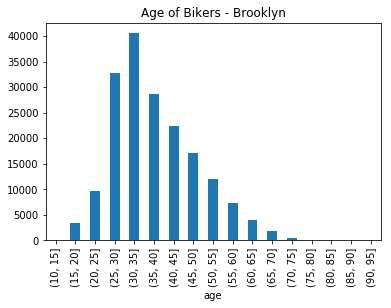

In [206]:
# make histograms

bins = np.arange(10, 99, 5)

axmanhattan = manhattan_df['age'].groupby(pd.cut(manhattan_df['age'], bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, title="Age of Bikers - Manhattan")

axbrooklyn = brooklyn_df['age'].groupby(pd.cut(brooklyn_df['age'], bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, title="Age of Bikers - Brooklyn")

### Null Hypothesis: H0: The age of bikers from Manhattan and Brooklyn are different i.e not correlated

### Alternate Hypothesis: H1: The age of bikers from Manhattan and Brooklyn are same i.e. correlated

### $\alpha = 0.05 $

In [207]:
manhattan_df.dropna(inplace=True)
brooklyn_df.dropna(inplace=True)

/Users/ilhayoun/devel/pui17/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ilhayoun/devel/pui17/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
ks = scipy.stats.ks_2samp(manhattan_df['age'], brooklyn_df['age'])
ks

Ks_2sampResult(statistic=0.066474596983801509, pvalue=0.0)

In [213]:
print(len(manhattan_df))
print(len(brooklyn_df))

1976803
180501


In [216]:
ps = scipy.stats.pearsonr(sorted(np.random.choice(brooklyn_df['age'], len(manhattan_df))),
                          sorted(manhattan_df['trip_duration']))
ps

(0.14873843983157747, 0.0)

In [218]:
sp = scipy.stats.spearmanr(sorted(np.random.choice(brooklyn_df['age'], len(manhattan_df))),
                          sorted(manhattan_df['trip_duration']))
sp

SpearmanrResult(correlation=0.99948434400469877, pvalue=0.0)

For both pearson and spearmans' tests, a P-value of 0.0 is given, which is less than 0.05, thus rejecting the null hypothesis. 